In [45]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [83]:
df = pd.read_csv('data/df_genial.csv')
print('Period: ', df.year.min(),df.year.max())
df.dtypes

Period:  2000 2020


year                      int64
district                 object
number_planted_trees      int64
species                   int64
Formede træer           float64
Gade- og allétræer      float64
Park- og naturtræer     float64
Private træer           float64
Træer i bevoksninger    float64
area_km2                float64
trees_km2               float64
avg_income              float64
avg_study_year          float64
dtype: object

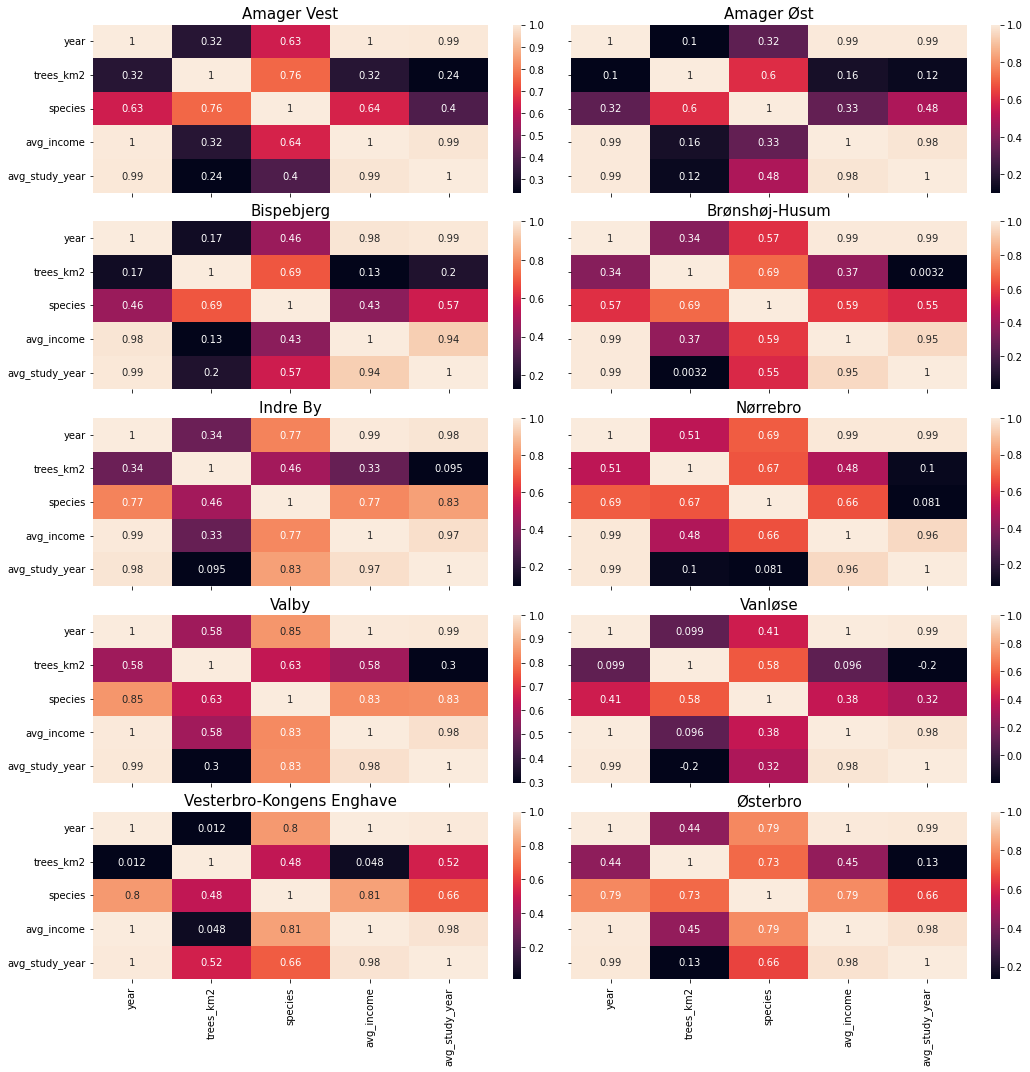

In [84]:
districts = df.district.unique()
features = ['year','trees_km2','species','avg_income','avg_study_year']
fig, axes = plt.subplots(5,2, figsize = (15,15), sharey=True)
rows = [0,0,1,1,2,2,3,3,4,4]
columns = [0,1,0,1,0,1,0,1,0,1]
i = 0
j = 0
for dist in districts:
    temp = df[df.district == dist][features]
    corr = temp.corr()
    sns.heatmap(corr, annot=True, ax=axes[rows[i],columns[j]])
    axes[rows[i],columns[j]].set_title(dist, fontsize=15)
    if rows[i] != 4:
        axes[rows[i],columns[j]].set_xticklabels('')
    i = i+1
    j = j+1
plt.tight_layout()
plt.show()

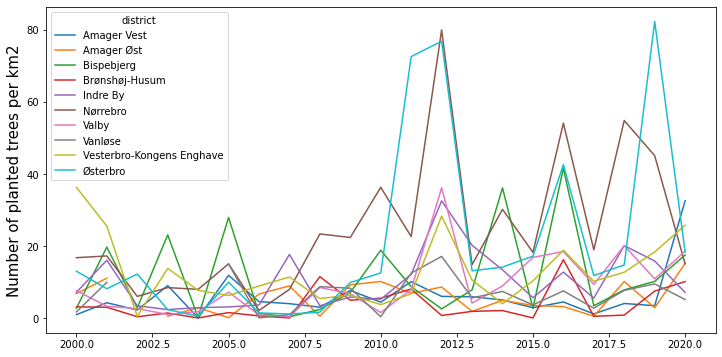

In [115]:
table = pd.pivot_table(data=df, index=['year'],columns='district',values='trees_km2')
table.plot(figsize=(12,6))
plt.xlabel('')
plt.ylabel('Number of planted trees per km2', fontsize=15)
plt.show()

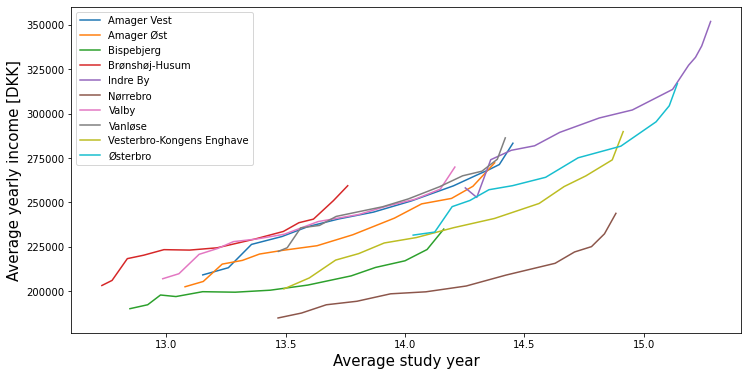

In [116]:
table = pd.pivot_table(index=['year'],columns='district', values=['avg_study_year','avg_income'], data=df)
plt.figure(figsize=(12,6))
plt.plot('avg_study_year','avg_income',data=table)
plt.xlabel('Average study year', fontsize=15)
plt.ylabel('Average yearly income [DKK]', fontsize=15)
plt.legend(districts)
plt.show()

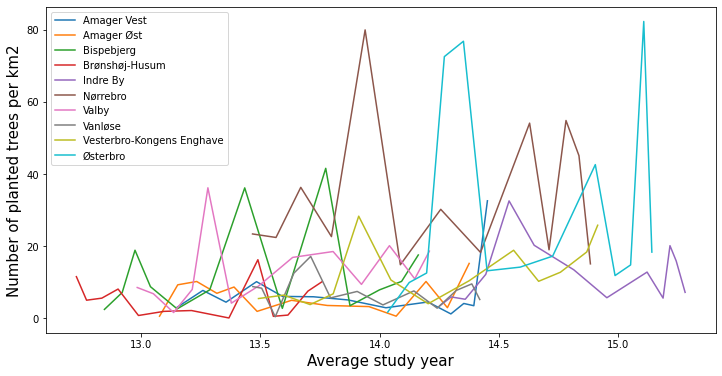

In [117]:
table = pd.pivot_table(index=['year'],columns='district', values=['avg_study_year','trees_km2'], data=df)
plt.figure(figsize=(12,6))
plt.plot('avg_study_year','trees_km2',data=table)
plt.xlabel('Average study year', fontsize=15)
plt.ylabel('Number of planted trees per km2', fontsize=15)
plt.legend(districts)
plt.show()

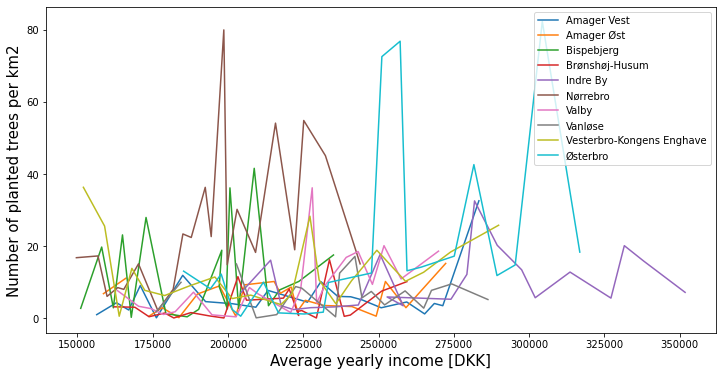

In [118]:
table = pd.pivot_table(index=['year'],columns='district', values=['avg_income','trees_km2'], data=df)
plt.figure(figsize=(12,6))
plt.plot('avg_income','trees_km2',data=table)
plt.xlabel('Average yearly income [DKK]', fontsize=15)
plt.ylabel('Number of planted trees per km2', fontsize=15)
plt.legend(districts)
plt.show()